In [19]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error 

## Задача 3

#### Создадим данные в виде странной шумной квадратной экспоненты на случайной сетке

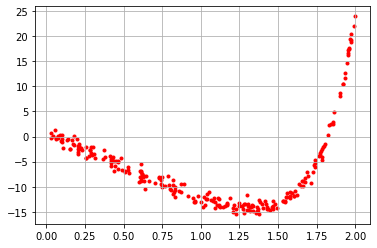

In [148]:
SIZE = 250
x = 2 * np.random.rand(SIZE)
y = np.exp(x ** 2) - 15 * x
y += np.random.normal(0, .8, SIZE)
fig, ax = plt.subplots()
ax.scatter(x,y, c='r', marker = '.')
ax.grid()
plt.show()

In [149]:
DEGREE = 8
polynomial_features = PolynomialFeatures(degree = DEGREE)
X = polynomial_features.fit_transform(x.reshape(-1,1))

In [150]:
def make_L1_GD_iteration(X, y, w, mu=0.1, lr=0.1):
    grad = 2*(X @ w - y) @ X + mu * np.sign(w)
    return w - lr * grad

#### Попробуем обучиться

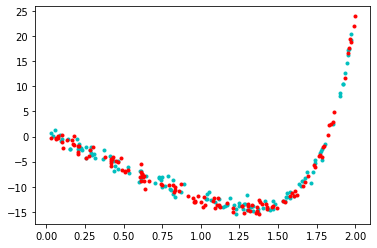

X_train.shape = (125, 9) y_train.shape = (125,)


In [151]:
part = int(np.round(SIZE/2))
X_train = X[:part]
y_train = y[:part]
X_test = X[part:]
y_test = y[part:]

plt.scatter(x[:part], y_train, c='c', marker='.')
plt.scatter(x[part:], y_test, c='r',marker='.')
plt.show()

print('X_train.shape =', X_train.shape, 'y_train.shape =', y_train.shape)

#### Инициализируем веса и посмотрим, что с ними будет

In [152]:
w0 = np.random.normal(0, 0.4, X_train.shape[1])
print(w0)
w1 = make_L1_GD_iteration(X_train, y_train, w0)
print(w1)
w = w0
for _ in range(20):
    w = make_L1_GD_iteration(X_train, y_train, w)
print(w)
print('учимся ежжи :)')

[-0.38102391 -0.31257704 -0.17774738 -0.04028575 -0.00653556 -0.69405025
 -0.7633275   0.18936931 -0.902367  ]
[   822.06277112   1591.06944491   3002.26659079   5634.24716195
  10576.60419221  19896.59282718  37533.01697848  71001.33222083
 134670.37722897]
[-8.07749800e+101 -1.45263066e+102 -2.64221153e+102 -4.85042258e+102
 -8.97210518e+102 -1.67021461e+103 -3.12598487e+103 -5.87754576e+103
 -1.10948589e+104]
учимся ежжи :)


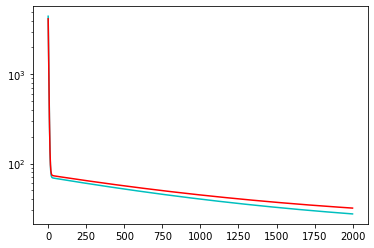

In [153]:
# теперь немного серьезнее
w = w0
lr = 10e-8
mu = 0.1
iter_number = 2000

train_losses = []
test_losses = []

for _ in range(iter_number):
    
    w = make_L1_GD_iteration(X_train, y_train, w, mu, lr)
    
    y_train_pred = X_train @ w
    y_test_pred = X_test @ w
    
    mse_train = mean_squared_error(y_train_pred, y_train)
    mse_test = mean_squared_error(y_test_pred, y_test)
    
    train_losses.append(mse_train)
    test_losses.append(mse_test)

plt.plot(range(len(train_losses)), train_losses, c='c')
plt.plot(range(len(test_losses)), test_losses, c='r')
plt.yscale('log')
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

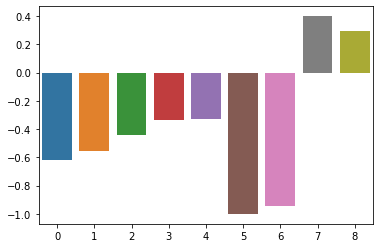

In [154]:
sns.barplot(list(range(len(w))), w)

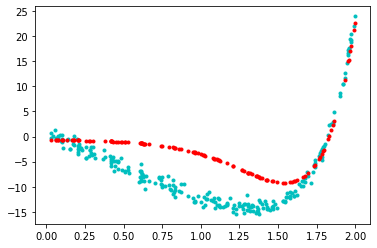

In [155]:
plt.scatter(x, y, c='c', marker = '.')
plt.scatter(x[part:], X_test @ w, c='r', marker ='.')
plt.show()

### Попробуем также поучиться с нормированными признаками

In [156]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

const_feature = np.ones(X_train.shape[0]).reshape(-1, 1)

X_train = np.hstack((X_train, const_feature))
X_test = np.hstack((X_test, const_feature))
print(X_train.shape, X_test.shape)

(125, 10) (125, 10)


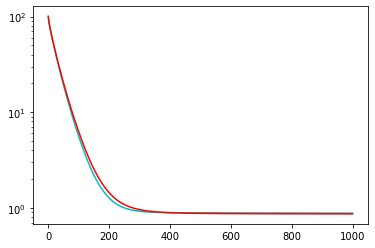

In [158]:
w0 = np.random.normal(0, 0.4, X_train.shape[1])
w = w0
lr = 10e-5
mu = 0.1
iter_number = 1000

train_losses = []
test_losses = []

for _ in range(iter_number):
    
    w = make_L1_GD_iteration(X_train, y_train, w, mu, lr)
    
    y_train_pred = X_train @ w
    y_test_pred = X_test @ w
    
    mse_train = mean_squared_error(y_train_pred, y_train)
    mse_test = mean_squared_error(y_test_pred, y_test)
    
    train_losses.append(mse_train)
    test_losses.append(mse_test)

plt.plot(range(len(train_losses)), train_losses, c='c')
plt.plot(range(len(test_losses)), test_losses, c='r')
plt.yscale('log')
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

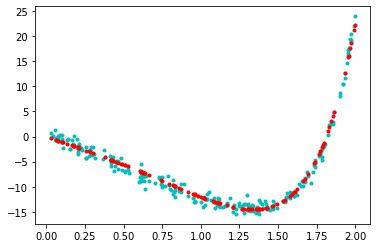

In [160]:
plt.scatter(x, y, c='c', marker = '.')
plt.scatter(x[part:], X_test @ w, c='r', marker ='.')
plt.plot

### KFold: WIP

In [161]:
n_splits = 3
kf = KFold(n_splits=n_splits)
KFold(n_splits=n_splits, random_state=None, shuffle=True)
for train_index, test_index in kf.split(X):
        print("TRAIN:", train_index, '\n', "TEST:", test_index, '\n')
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
#       а тут будем учиться

TRAIN: [ 84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249] 
 TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83] 

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10